绘制股价和沪深300的对比图

要点：
* 双轴坐标显示
* dataframe取某段时间内的数据(iloc)
* twinx()，在同一个图上绘制2种不同坐标的曲线

Bug:
* 当两者日期不一样时，如何填充空位的数据为Null

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题
import pandas as pd
import tushare as ts
import talib
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib
%matplotlib inline

BenchmarkCode="000300.SH"

# 既可以通过代码显示，也可以通过简称来查询

Code='300383'
CodeFull=Code
if Code[0]=='0' or Code[0]=='3':
    CodeFull=Code + '.SZ'
elif Code[0]=='6':
    CodeFull=Code + '.SH'

StockName1='东方雨虹'

startdate='2015-01-05'
enddate = datetime.today() #开始时间结束时间，选取最近一年的数据
enddate = str(enddate)[0:10]


In [3]:
import csv
import os

#当前文件的路径
pwd = os.getcwd()
#当前文件的父路径
father_path=os.path.abspath(os.path.dirname(pwd)+os.path.sep+".")


with open(father_path + "/DataRepository/db00011.csv",newline='', encoding='UTF-8') as csv_file:
    csv_reader = csv.DictReader(csv_file) #,fieldnames=['symbol','name']
    dictcode={}
    dictname={}
    for row in csv_reader:
        dictcode[row['symbol']]=row['name']
        dictname[row['name']]=row['symbol']

StockName=(dictcode[Code])
CodeName=(dictname[StockName1])

if CodeName[0]=='0' or CodeName[0]=='3':
    CodeNameFull=CodeName + '.SZ'
elif CodeName[0]=='6':
    CodeNameFull=CodeName + '.SH'
    
print(StockName1 + ':' +CodeNameFull)

东方雨虹:002271.SZ


In [4]:
token='f20927201ecc20e3cea9279abacfbb1d39a9624820d9b2f94613f722'
pro=ts.pro_api(token)
print(startdate)
df = ts.pro_bar(ts_code=CodeNameFull, api=None, adj='qfq', start_date=startdate, end_date=enddate)


2015-01-05


In [4]:

df.index = pd.to_datetime(df['trade_date'])
print("df 共有：" + str(len(df)))
# print(df)

# 沪深300
df_benchmark = pro.index_daily(ts_code=BenchmarkCode,startdate=startdate,enddate=enddate)
df_benchmark.index = pd.to_datetime(df_benchmark['trade_date'])

# print(startdate)
# 20191101的形式
str_startdate1=startdate[0:4] + startdate[5:7] + startdate[8:11]
# print(str_startdate1)

df_benchmark_new=df_benchmark.loc[df_benchmark['trade_date']>=str_startdate1] 
print("df_benchmark 共有：" +  str(len(df_benchmark_new)))
# print(df_benchmark_new)


#提取收盘价
# closed=df['close'].values

#获取均线的数据，通过timeperiod参数来分别获取 5,10,20 日均线的数据。
# ma5=talib.SMA(closed,timeperiod=5)
# ma10=talib.SMA(closed,timeperiod=10)
# ma20=talib.SMA(closed,timeperiod=20)
# ma60=talib.SMA(closed,timeperiod=60)

# 沪深300
# df_benchmark = pro.index_daily(ts_code=BenchmarkCode)

# print(df_benchmark)

df 共有：1193
df_benchmark 共有：1193


In [5]:
stockline = [datetime.strptime(d, '%Y%m%d').date() for d in df.trade_date]
# plt.plot(stockline,df.close, '-', label = df.ts_code[0])

# df.index = pd.to_datetime(df['trade_date'])

# print(df_benchmark)
# df_benchmark.loc[startdate:]
# startdate='2015-01-04'

# print(df_benchmark)


# print(startdate)
# print(df_benchmark_new)
# print("df_benchmark 共有：" + str(len(df_benchmark.loc[df_benchmark['trade_date']>=startdate])))
# print(df_benchmark.loc[df_benchmark['trade_date']<=startdate])
# print(stockline)
# print(df_benchmark.iloc['2015-01-01']:)
# df.iloc['1990-12-20':'1990-12-21',:]
# plt.figure(figsize=(20, 10))
# print(df.head())

东方雨虹:20150105- 2019-11-25 涨幅: 158.2%
Benchmark:20150105- 2019-11-25 涨幅: 6.5%


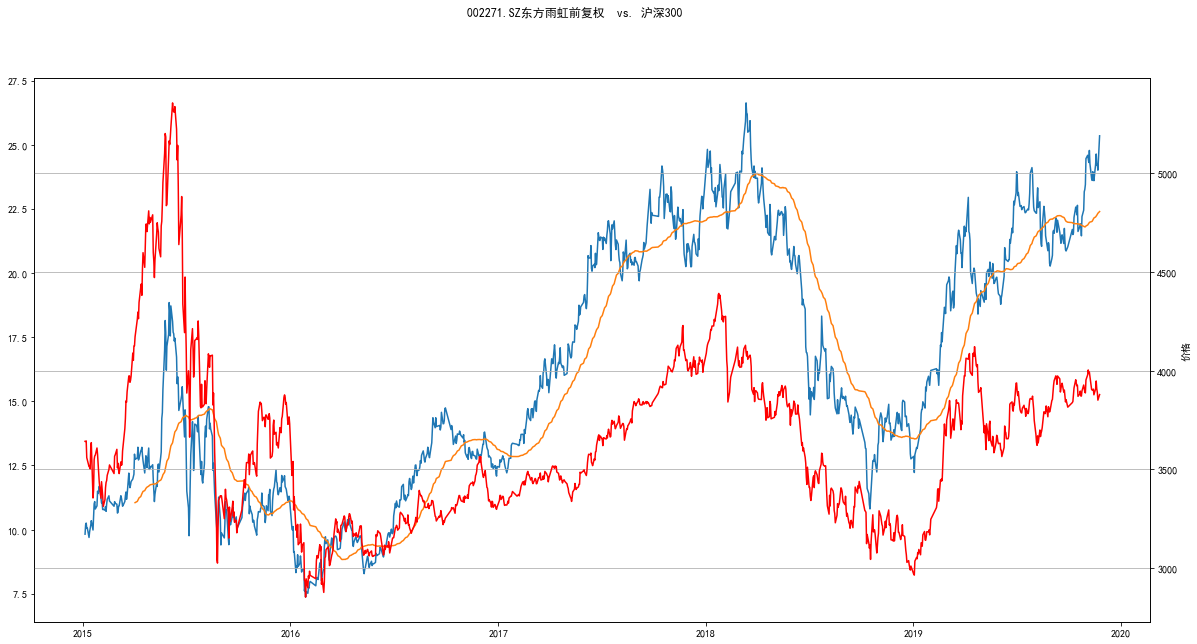

In [6]:

# df['close'].plot(title=CodeNameFull +StockName1 +'前复权价格图')
# df['close'].rolling(center=True,window=60).mean().plot()
# df['close'].rolling(60).mean().shift(-59).plot()

# df_benchmark.close['20110105':].plot(title=IndexCode +' 价格曲线')
# df_benchmark.plot(title=' 价格曲线')

# df_benchmark.close.plot(title=BenchmarkCode +' 价格曲线',figsize=(20,10))
# df_benchmark.plot(title=' 价格曲线')

# #####################双坐标显示###########################
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(stockline, df.close, '-', label = df.ts_code[0])
ax1.plot(stockline,df['close'].rolling(60).mean().shift(-59), '-', label = df.ts_code[0])

ax2 = ax1.twinx()
ax2.plot(stockline, df_benchmark_new.close, '-', label = df.ts_code[0],color='r')
# ax2.plot(stockline,df_benchmark_new.close.rolling(60).mean().shift(-59), '-', label = df.ts_code[0])
###########################################################


# plt.figure(figsize=(20,10))
# plt.plot(stockline, df.close, '-', label = df.ts_code[0])
# plt.plot(stockline,df['close'].rolling(60).mean().shift(-59), '-', label = df.ts_code[0])
    
# stockline = [datetime.strptime(d, '%Y%m%d').date() for d in df_benchmark.trade_date]
# plt.plot(stockline, df_benchmark.close, '-', label = df.ts_code[0])

# axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=80)
# axes[0].plot(x, y_shanghai, color="r", linestyle="--",label="上海")
# axes[1].plot(x, y_beijing, color="b", label="北京")

# axes[0].plot(stockline, df_benchmark_new.close, '-', label = df.ts_code[0])
# axes[1].plot(stockline, df.close, '-', label = df.ts_code[0])

# plt.plot(stockline, df_benchmark_new.close, '-', label = df.ts_code[0])


# print(df_benchmark.count)
# print(df.ts_code[0])

# plt.plot(stockline,df_benchmark.close, '-', label = df.ts_code[0])
# plt.set_title("前复权价格图")


#添加网格，可有可无，只是让图像好看点
plt.grid()
#记得加这一句，不然不会显示图像
#plt.show()
plt.xlabel('年')
plt.ylabel('价格')
#设置标题
plt.suptitle(CodeNameFull +StockName1 +'前复权' + "  vs. 沪深300",fontsize='large',fontweight='bold')

enddateprice=df.T[df.index [0]]['close']
startdateprice=df.T[df.index [-1]]['close']
startdate=df.T[df.index [-1]]['trade_date']
variation=(enddateprice-startdateprice)*100/startdateprice
variationstring=" %.1f%%"  % variation
print(StockName1 + ":" + startdate + "- " + enddate + " 涨幅:" + variationstring)

enddateprice=df_benchmark_new.T[df_benchmark_new.index [0]]['close']
startdateprice=df_benchmark_new.T[df_benchmark_new.index [-1]]['close']
startdate=df_benchmark_new.T[df_benchmark_new.index [-1]]['trade_date']
variation=(enddateprice-startdateprice)*100/startdateprice
variationstring=" %.1f%%"  % variation
print('Benchmark:' + startdate + "- " + enddate + " 涨幅:" + variationstring)